In [1]:
# random forestで来客予測
# Manthata William Time series decomposition 
import numpy as np
from pandas import DataFrame
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import *
import statsmodels.api as sm



In [182]:
#import data 
df = pd.read_csv('/Users/thakgatsomanthata/Downloads/CustomerNumberHistory.csv')


# df = df.iloc[: , :-1]
# df.index.name = "ds"
df.columns = ["ds","y"]
df["Time_stamp"] = pd.to_datetime(df["ds"],yearfirst= True, infer_datetime_format= True, exact= True)
df = df.set_index("Time_stamp")
df = df.drop("ds", axis=1)
# df["ds"] = pd.to_datetime(df["ds"]).dt.day
# df["Month"] = pd.to_datetime(df["ds"]).dt.month
df=df[df!=0].dropna()
df =df[df!=1].dropna()
# df=df[df<=1000].dropna()

<AxesSubplot:xlabel='Time_stamp'>

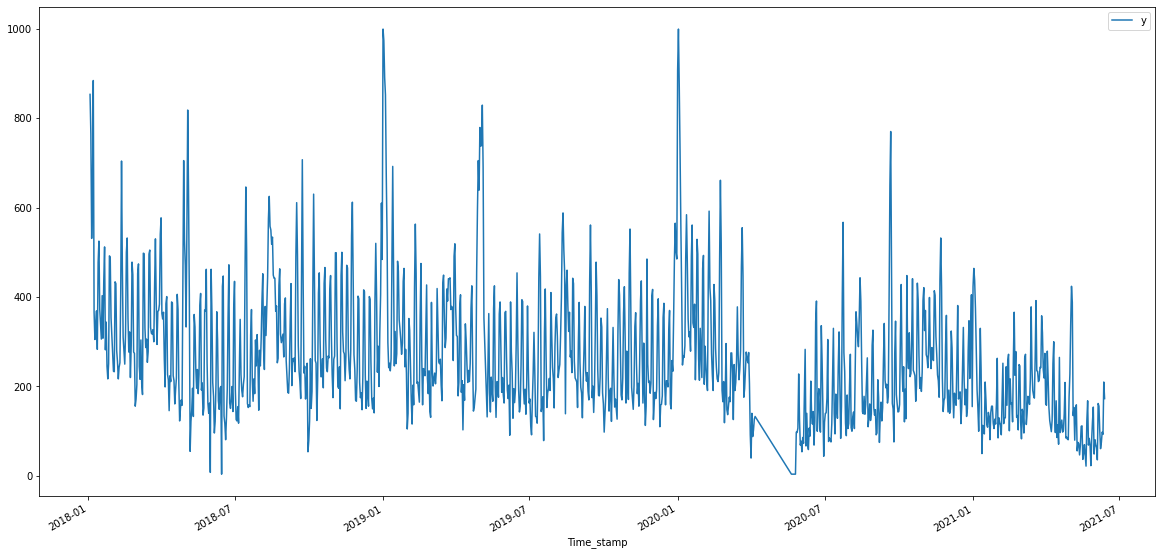

In [183]:
df.plot(figsize=(20,10))

In [184]:
decomposition1 = sm.tsa.seasonal_decompose(df, model='multiplicative', period=360)
df_season = pd.DataFrame(decomposition1.seasonal)

In [185]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=90)
df_trend = pd.DataFrame(decomposition1.trend)

Text(0, 0.5, 'Customer count')

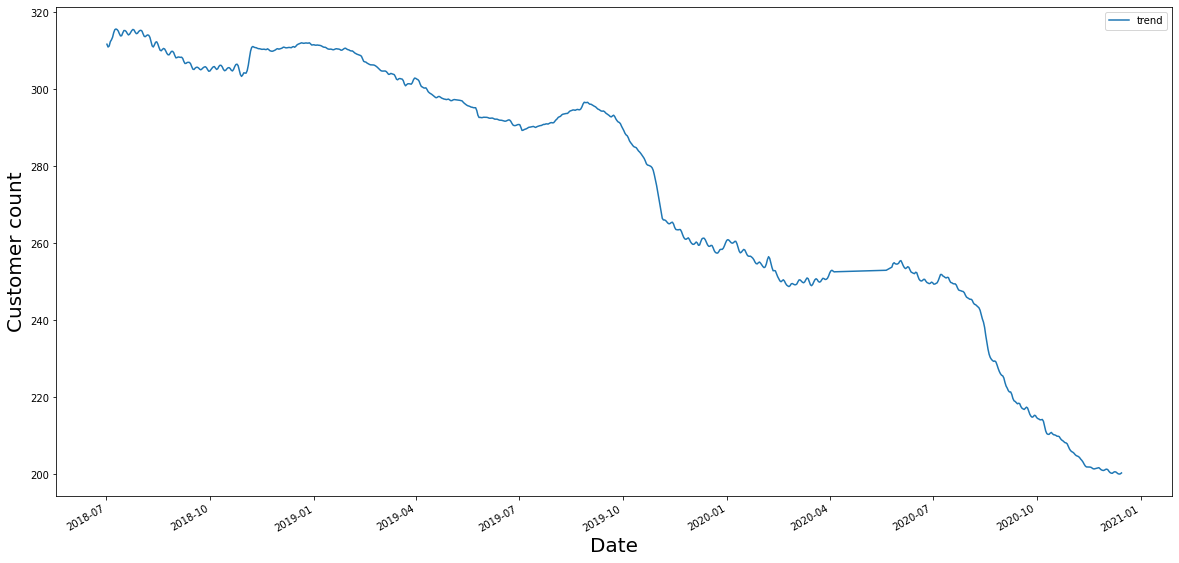

In [186]:
df_trend.plot(figsize=(20,10))
plt.xlabel("Date", fontsize=20)
plt.ylabel("Customer count", fontsize=20)

Text(0, 0.5, 'Customer count')

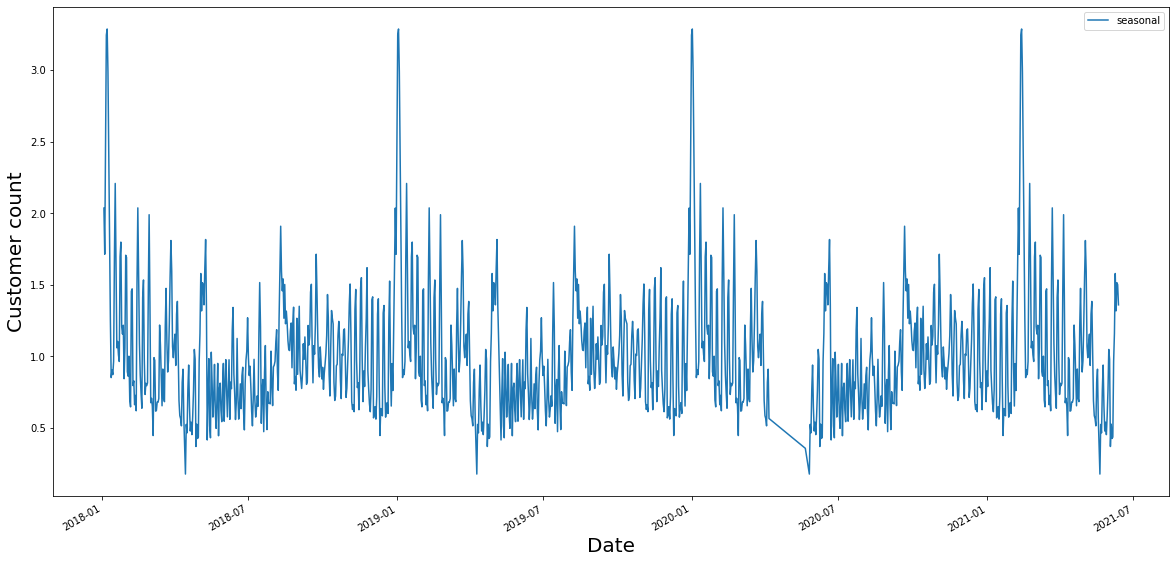

In [187]:
df_season.plot(figsize=(20,10))
plt.xlabel("Date", fontsize=20)
plt.ylabel("Customer count", fontsize=20)

In [188]:
trend = df

In [189]:
trend["360d trend"] = trend["y"].rolling(window=360).mean()
trend["180d trend"] = df["y"].rolling(window=180).mean()
trend["90d trend"] = df["y"].rolling(window=90).mean()
# trend["30 d trend"] = df["y"].rolling(window=30).mean()
# trend = df

In [190]:
trend.isna().sum()
trend.dropna(inplace=True)

In [191]:
trend = trend.drop(["y"], axis =1)

<AxesSubplot:xlabel='Time_stamp'>

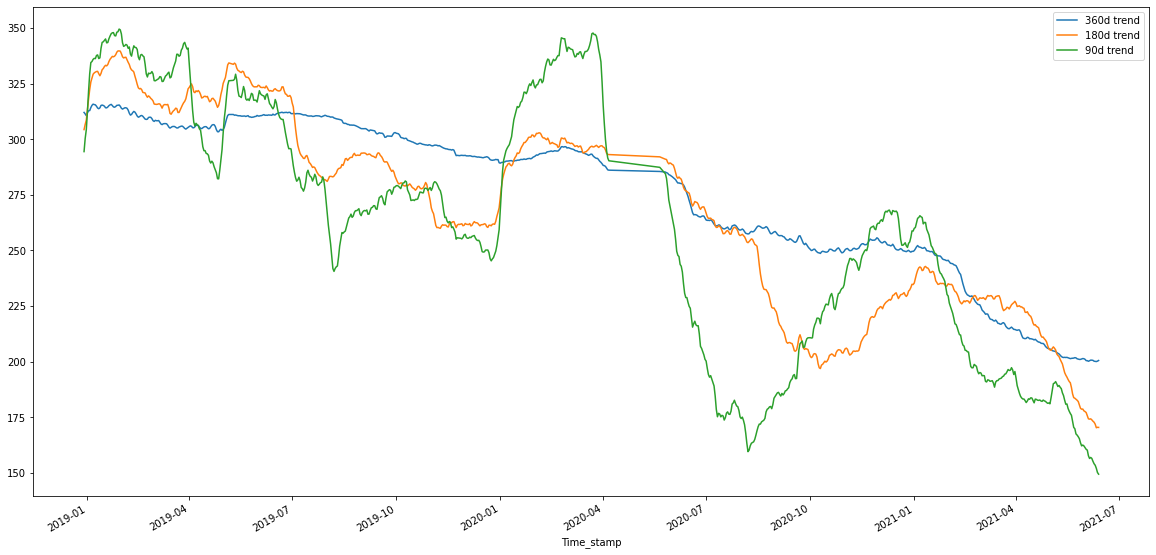

In [192]:
trend.plot(figsize=(20,10))

<AxesSubplot:xlabel='Time_stamp'>

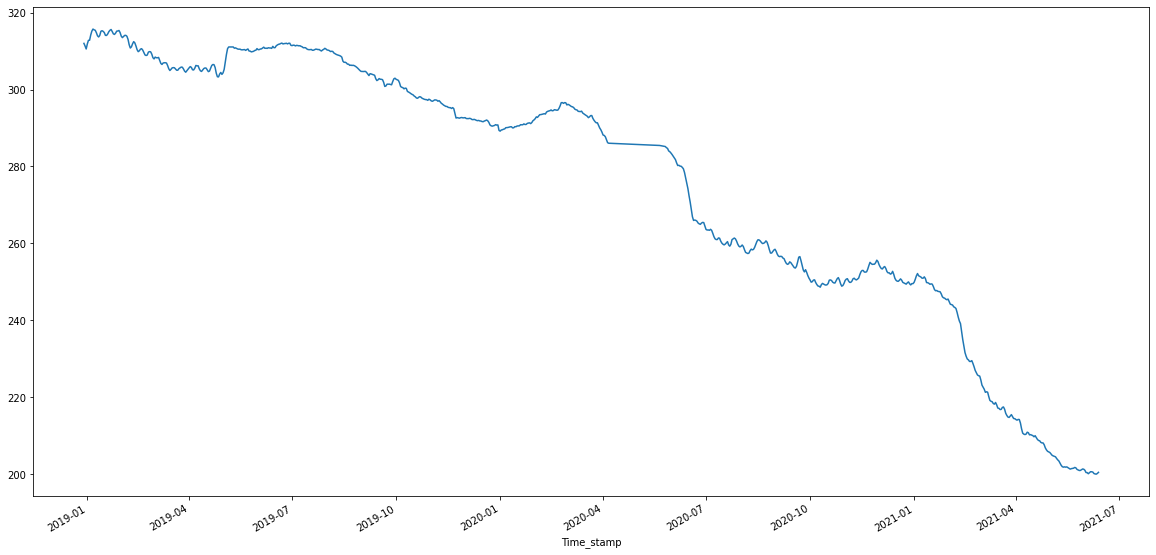

In [120]:
trend["360 d trend"].plot(figsize=(20,10))